# Visualize the isotope profiles

This notebook displays the isotope profile data and comments on some of the observed patterns.

General info on the tracer experiment is in the [`readme.md`](../readme.md) file in the home folder. Details about the isotope data collection and analysis are in the [`README_Isotope_Sample_data.txt`](README_Isotope_Sample_data.txt) file.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data
T = pd.read_csv("Samples_dataset_2023-12-05.csv")

# Create some new variables
T['depth_mean'] = (T['depth_min'] + T['depth_max']) / 2
T['core'] = pd.Categorical(T['core'])
T['day'] = (T['date'].apply(pd.to_datetime,dayfirst=True) - pd.to_datetime('2023-09-12')) / np.timedelta64(1, 'D') #days after the tracer application

# extract 'special' samples from the main dataframe
tap = (T[T['shortID'] == 'TAP']).reset_index()  # Extract tap water
input_water = (T[T['shortID'] == 'INPUT']).reset_index()  # Extract input water
extra_sample = (T[T['shortID'] == 'D020b']).reset_index()  # Extract an extra sample collected on day 1 at 20 cm where the soil was very blue
T = T[~T['shortID'].isin(['TAP', 'INPUT','D020b','B075'])] #remove B075 since it's only core that went down to 75

# Clean the dataset
    # - Core E depth 20 had a very unusual value that is interpreted as non reliable
T.loc[(T['core'] == 'E') & (T['depth_min'] == 20), 'd18O'] = np.nan

## Samples collected before tracer application

The isotope profiles A-B were collected outside of the tracer application area, to characterize the isotope composition of bulk soil water before tracer application. These values are interpreted in the context of regional precipitation isotope composition in the central Tuscany region (see Natali et al. [2021](https://doi.org/10.1016/j.jhydrol.2021.126944))

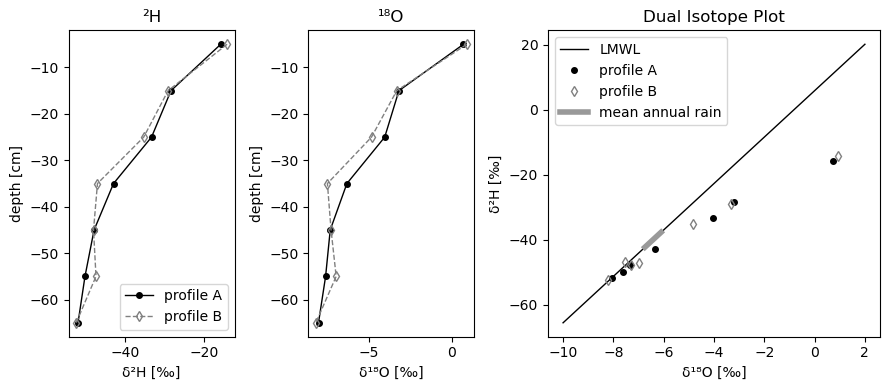

In [6]:
# add some info on the local MWL
xWL = np.array([-10, 2])
wl_FiSi = 7.14 * xWL + 5.82  # LMWL for Florence-Siena
d18O_ann = [-6.7503, -6.1011] #typical precipitation-weighted mean annual precip composition
d2H_ann = [-42.3519,  -37.7168] #typical precipitation-weighted mean annual precip composition


# Show samples before tracer application (day 2023-09-12)
q0 = T['date'] == '12/09/2023'
tmp = T[q0]

# Make a figure
fig, axes = plt.subplots(1, 3, gridspec_kw={'width_ratios': [1.5, 1.5, 3]}, figsize=(9, 4))
#fig, axes = plt.subplots(1, 3, figsize=(10, 5))

# Plot d2H
axes[0].plot(tmp[tmp['core'] == 'A']['d2H'], -tmp[tmp['core'] == 'A']['depth_mean'], 
             '-o', markersize=4, color='k', linewidth=1, 
             label='profile A')
axes[0].plot(tmp[tmp['core'] == 'B']['d2H'], -tmp[tmp['core'] == 'B']['depth_mean'], 
             '--d', markersize=5, color=[.5,.5,.5],  markeredgecolor=[.5,.5,.5],markerfacecolor='none', linewidth=1, 
             label='profile B')
axes[0].set(xlabel='δ²H [‰]', ylabel='depth [cm]', title='²H')
axes[0].legend()

# Plot d18O
axes[1].plot(tmp[tmp['core'] == 'A']['d18O'], -tmp[tmp['core'] == 'A']['depth_mean'], 
             '-o', markersize=4, color='k', linewidth=1, 
             label='profile A')
axes[1].plot(tmp[tmp['core'] == 'B']['d18O'], -tmp[tmp['core'] == 'B']['depth_mean'], 
             '--d', markersize=5, color=[.5,.5,.5],  markeredgecolor=[.5,.5,.5],markerfacecolor='none', linewidth=1, 
             label='profile B')
axes[1].set(xlabel='δ¹⁸O [‰]', ylabel='depth [cm]', title='¹⁸O')

# Plot δ18O vs δ2H
axes[2].plot(xWL, wl_FiSi, 'k', linewidth=1, label='LMWL')
axes[2].plot(tmp[tmp['core'] == 'A']['d18O'], tmp[tmp['core'] == 'A']['d2H'], 
             'o', markersize=4, color='k', linewidth=1, 
             label='profile A')
axes[2].plot(tmp[tmp['core'] == 'B']['d18O'], tmp[tmp['core'] == 'B']['d2H'], 
             'd', markersize=5, color=[.5,.5,.5],  markeredgecolor=[.5,.5,.5],markerfacecolor='none', linewidth=1, 
             label='profile B')
axes[2].set(xlabel='δ¹⁸O [‰]', ylabel='δ²H [‰]', title='Dual Isotope Plot')
axes[2].plot(d18O_ann,d2H_ann,linewidth=4,color='.6',label='mean annual rain')
axes[2].legend()

plt.tight_layout()
plt.show()

### What we can observe

We can see a very strong fractionation signal at the top of the profiles, which reflects the very dry soil condition at the end of a Mediterranean summer. Yet, samples below 30-40 cm have almost no sign of fractionation. The deeper samples lie on the local meteoric water line (LMWL), below the typical precipitation mean annual values (grey band around (-6.4,-40) in the plot). This suggest that those deeper samples mainly include water that fell during winter.

## All isotope profiles

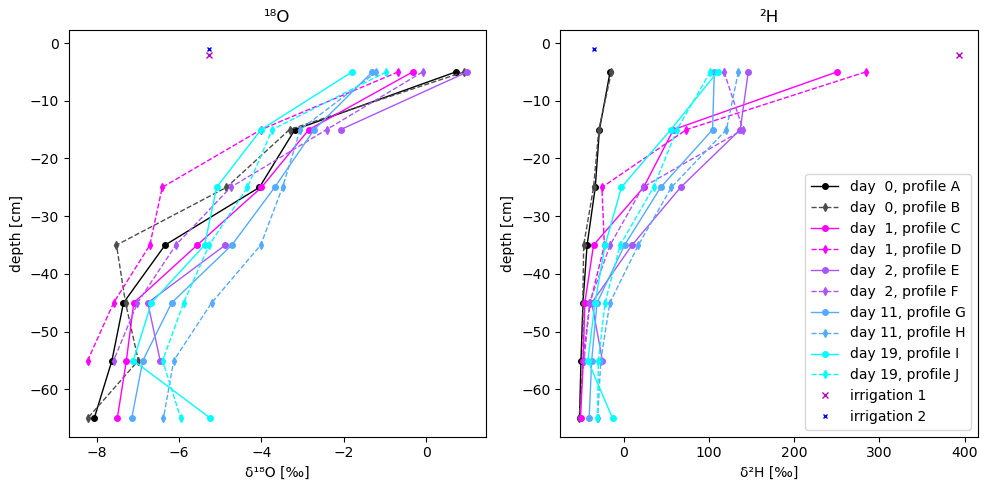

In [7]:
# Plot δ18O and δ2H for different profiles
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
col = ['k','.3','tab:orange','tab:orange','tab:green','tab:green','tab:red','tab:red','tab:purple','tab:purple']
col = ['k','.3',
       [1   , 0   , 1],[1   , 0   , 1],
       [0.67, 0.33, 1],[0.67, 0.33, 1],
       [0.33, 0.67, 1],[0.33, 0.67, 1],
       [0   , 1   , 1],[0   , 1   , 1],
       ]
linestyle = ['-','--','-','--','-','--','-','--','-','--']
markerstyle = ['o','d','o','d','o','d','o','d','o','d']
day = T['day'].unique()
day = np.array([day[0],day[0],day[1],day[1],day[2],day[2],day[3],day[3],day[4],day[4]])

axes[0].set(xlabel='δ¹⁸O [‰]', ylabel='depth [cm]', title='¹⁸O')
for i, prof in enumerate(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']):
    axes[0].plot(T[T['core'] == prof]['d18O'], -T[T['core'] == prof]['depth_mean'], 
                 marker=markerstyle[i], linestyle=linestyle[i], color=col[i], markersize=4, linewidth=1, 
                 label=f'day {day[i]:.0f}, profile {prof}')
axes[0].plot(input_water['d18O'],-2,'x',markersize=5,color='m',markerfacecolor='m',label='irrigation 1')
axes[0].plot(tap['d18O'],-1,'x',markersize=3,color='b',markerfacecolor='b',label='irrigation 2')



axes[1].set(xlabel='δ²H [‰]', ylabel='depth [cm]', title='²H')
for i, prof in enumerate(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']):
    axes[1].plot(T[T['core'] == prof]['d2H'], -T[T['core'] == prof]['depth_mean'], 
                 marker=markerstyle[i], linestyle=linestyle[i], color=col[i], markersize=4, linewidth=1, 
                 label=f'day {day[i]:2.0f}, profile {prof}')
axes[1].plot(input_water['d2H'],-2,'x',markersize=5,color='m',markerfacecolor='m',label='irrigation 1')    
axes[1].plot(tap['d2H'],-1,'x',markersize=3,color='b',markerfacecolor='b',label='irrigation 2')
axes[1].legend()

plt.tight_layout()
plt.show()

### What we can observe

The $\delta^{18}\textrm{O}$ values are generally similar to the initial profiles (in black and gray). The large irrigation input only slightly moved the isotope profiles towards the tap water value. Note that the x-scale of the $^{18}\textrm{O}$ plot is just (-8, 0)‰

The $\delta^{2}\textrm{H}$ values are visibly influenced by both irrigations: 

- Right after the tracer application (day 1, fucsia curves) the top of the profile gets close to the irrigation 1 values and departs significantly from the initial profile until the depth of 40 cm
- After the second irrigation, which only included tracer-free tap water (day 2, violet curves), we see that the isotope profile is pushed downwards and the very top gets closer to the irrigation 2 values
- After 11 and 19 days we see that the top of the profile is generally closer to the irrigation 2 water but the lower part of the profile did not change much (there was no precipitation in-between)

Note that the x-scale of the $^{2}\textrm{H}$ plot is as large as (-50, 400)‰

#### Summary figure

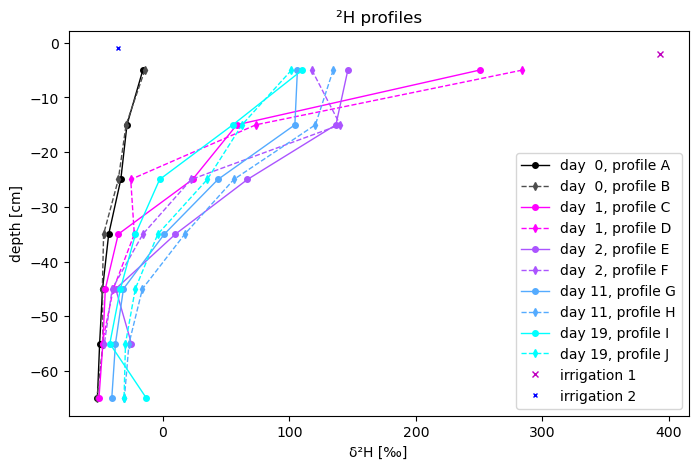

In [8]:
# Plot δ18O and δ2H for different profiles
fig, axes = plt.subplots(1, 1, figsize=(8, 5))
col = ['k','.3','tab:orange','tab:orange','tab:green','tab:green','tab:red','tab:red','tab:purple','tab:purple']
col = ['k','.3',
       [1   , 0   , 1],[1   , 0   , 1],
       [0.67, 0.33, 1],[0.67, 0.33, 1],
       [0.33, 0.67, 1],[0.33, 0.67, 1],
       [0   , 1   , 1],[0   , 1   , 1],
       ]
linestyle = ['-','--','-','--','-','--','-','--','-','--']
markerstyle = ['o','d','o','d','o','d','o','d','o','d']
day = T['day'].unique()
day = np.array([day[0],day[0],day[1],day[1],day[2],day[2],day[3],day[3],day[4],day[4]])

axes.set(xlabel='δ²H [‰]', ylabel='depth [cm]', title='²H profiles')
for i, prof in enumerate(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']):
    axes.plot(T[T['core'] == prof]['d2H'], -T[T['core'] == prof]['depth_mean'], 
                 marker=markerstyle[i], linestyle=linestyle[i], color=col[i], markersize=4, linewidth=1, 
                 label=f'day {day[i]:2.0f}, profile {prof}')
axes.plot(input_water['d2H'],-2,'x',markersize=5,color='m',markerfacecolor='m',label='irrigation 1')    
axes.plot(tap['d2H'],-1,'x',markersize=3,color='b',markerfacecolor='b',label='irrigation 2')
axes.legend()

plt.show()

# save the figure to file
save_fig = False
if save_fig:
    fig.savefig("d2H_profiles.png",bbox_inches='tight', pad_inches=0.1)